In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
import zipfile

zip_fold="/content/drive/MyDrive/Veriseti.zip"
shutil.copy(zip_fold,".")

with zipfile.ZipFile('./Veriseti.zip','r') as zip_ref:
  zip_ref.extractall('.')

In [ ]:

import os
import cv2
from tqdm import tqdm


LABELS=["Kelebek", "Kurbaga", "Serbest", "Sirt"]
DIR="Branslar"

data= []

for label in LABELS:
   folder_address= os.path.join(DIR, label)
   value=LABELS.index(label)
   for picture_name in tqdm(os.listdir(folder_address)):
    picture_address=os.path.join(folder_address,picture_name)
    pic=cv2.imread(picture_address,cv2.IMREAD_GRAYSCALE)
    if(pic is None):
      print("Error")
    else:
      pic=cv2.resize(pic,(220,180))
      data.append([pic, value])


100%|██████████| 271/271 [00:01<00:00, 199.24it/s]


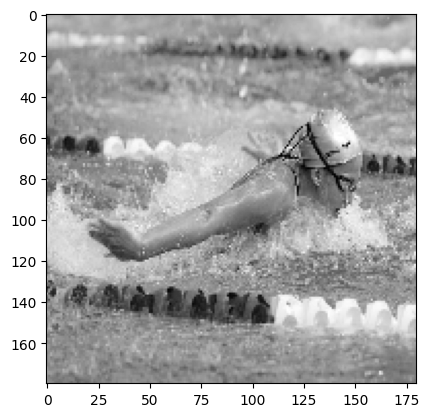

In [ ]:
from matplotlib import pyplot
pyplot.imshow(data[0][0],cmap='gray')

In [ ]:
import random
random.shuffle(data)

X=[]
Y=[]
for x,y in data:
  X.append(x)
  Y.append(y)


#X[1000]
"""
from matplotlib import pyplot
pyplot.imshow(data[747][0])
pyplot.imshow(X[0])

"""

del data

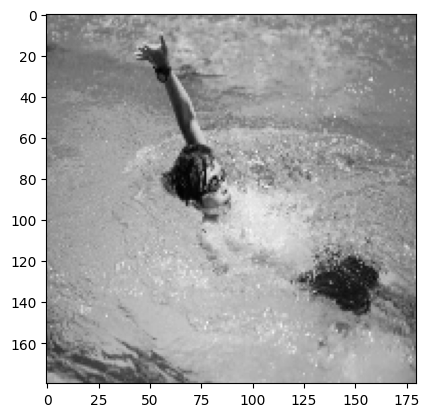

In [ ]:
pyplot.imshow(X[1],cmap='gray')

In [ ]:
Y[1]

3

In [ ]:
import numpy as np



X= np.array(X).reshape(-1,180,180,1)
Y= np.array(Y).reshape(-1,1)

"""
# X artık numpy arrayi
X[0][0][0]
pyplot.imshow(X[0],cmap='gray')
"""


"\n# X artık numpy arrayi\nX[0][0][0]\npyplot.imshow(X[0],cmap='gray')\n"

In [ ]:
X[0].shape

(180, 180, 1)

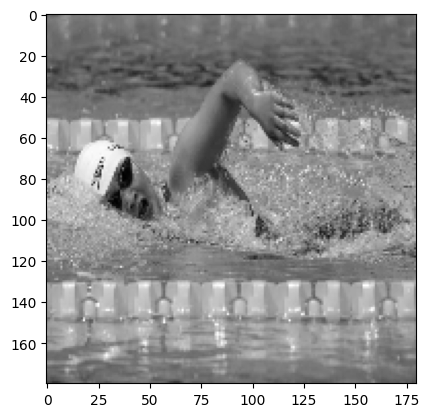

In [ ]:
"""
Networke Giren Sayılar 0 ile 1 arasında olunca daha verimli eğitim sağlıyor
Normalization
"""
from matplotlib import pyplot
X=X/255

pyplot.imshow(X[1097],cmap='gray')

**Model Eğitimine Başlıyoruz**





In [ ]:
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, Flatten, Dense, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint


model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=X[0].shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(filters=16,kernel_size=(2,2), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=X[0].shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(filters=16,kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd',metrics=[keras.metrics.SparseCategoricalAccuracy()])





In [ ]:
model.fit(X,Y,batch_size=32, epochs=100,validation_split=0.15)

Epoch 1/100
30/30 [==============================] - 4s 38ms/step - loss: 1.4058 - sparse_categorical_accuracy: 0.2674 - val_loss: 1.3856 - val_sparse_categorical_accuracy: 0.2500
Epoch 2/100
30/30 [==============================] - 1s 18ms/step - loss: 1.2613 - sparse_categorical_accuracy: 0.4027 - val_loss: 1.3783 - val_sparse_categorical_accuracy: 0.3036
Epoch 3/100
30/30 [==============================] - 1s 19ms/step - loss: 1.1032 - sparse_categorical_accuracy: 0.5518 - val_loss: 1.3976 - val_sparse_categorical_accuracy: 0.2679
Epoch 4/100
30/30 [==============================] - 1s 18ms/step - loss: 0.9011 - sparse_categorical_accuracy: 0.6596 - val_loss: 1.4728 - val_sparse_categorical_accuracy: 0.2679
Epoch 5/100
30/30 [==============================] - 1s 19ms/step - loss: 0.7369 - sparse_categorical_accuracy: 0.7114 - val_loss: 1.8196 - val_sparse_categorical_accuracy: 0.2679
Epoch 6/100
30/30 [==============================] - 1s 19ms/step - loss: 0.6162 - sparse_categorica

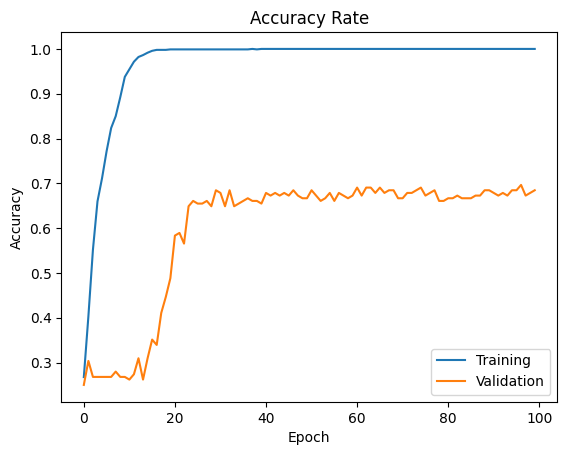

In [ ]:
pyplot.plot(model.history.history['sparse_categorical_accuracy'])
pyplot.plot(model.history.history['val_sparse_categorical_accuracy'])
pyplot.title('Accuracy Rate')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.legend(['Training','Validation'],loc='lower right')

In [ ]:
model.save('Swim_Stroke_Recognition_AI_Model.h5')

NameError: name 'model' is not defined

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
Swimmer_Stroke_Recognition_AI_Model=load_model('Swim_Stroke_Recognition_AI_Model.h5')

In [ ]:
Swimmer_Stroke_Recognition_AI_Model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 178, 178, 32)      320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 59, 59, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 58, 58, 16)        2064      
                                                                 
 batch_normalization_14 (Ba  (None, 58, 58, 16)        64        
 tchNormalization)                                               
                                                                 
 conv2d_30 (Conv2D)          (None, 56, 56, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 18, 18, 32)       